In [466]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn_data.csv


# Introduction

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 
For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Understanding and defining churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

# Definitions of churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

# High-value churn

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

# Understanding the business objective and the data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


# Understanding customer behaviour during churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Data Dictionary

* **Acronyms**          Descriptions
* **MOBILE_NUMBER**	    Customer phone number
* **CIRCLE_ID**	        Telecom circle area to which the customer belongs to 
* **LOC**	            Local calls - within same telecom circle
* **STD**	            STD calls - outside the calling circle
* **IC**	            Incoming calls 
* **OG**	            Outgoing calls
* **T2T**	            Operator T to T, i.e. within same operator (mobile to   mobile)

* **T2M**    	        Operator T to other operator mobile 
* **T2O**    	        Operator T to other operator fixed line 
* **T2F**    	        Operator T to fixed lines of T 
* **T2C**    	        Operator T to it’s own call center
* **ARPU**    	        Average revenue per user
* **MOU**    	        Minutes of usage - voice calls
* **AON**   	        Age on network - number of days the customer is using the operator T network
* **ONNET**   	        All kind of calls within the same operator network
* **OFFNET**    	    All kind of calls outside the operator T network
* **ROAM**	            Indicates that customer is in roaming zone during the call
* **SPL**   	        Special calls
* **ISD**    	        ISD calls
* **RECH**    	        Recharge
* **NUM**    	        Number
* **AMT**    	        Amount in local currency
* **MAX**    	        Maximum
* **DATA**    	        Mobile internet
* **3G**    	        3G network
* **AV**    	        Average
* **VOL**    	        Mobile internet usage volume (in MB)
* **2G**    	        2G network
* **PCK**    	        Prepaid service schemes called - PACKS
* **NIGHT**    	        Scheme to use during specific night hours only
* **MONTHLY**    	    Service schemes with validity equivalent to a month
* **SACHET**   	        Service schemes with validity smaller than a month
* **.6**    	        KPI for the month of June
* **.7**    	        KPI for the month of July
* **.8**    	        KPI for the month of August
* **.9**    	        KPI for the month of September
* **FB_USER**	        Service scheme to avail services of Facebook and similar social networking sites

* **VBC**    	        Volume based cost - when no specific scheme is not purchased and paid as per usage


In [467]:
# Importing all the import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Data Loading

In [468]:
# loading csv file to churn dataframe
churn=pd.read_csv('/kaggle/input/telecom-churn/telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [469]:
# Checking the shape of the data
churn.shape

(99999, 226)

In [470]:
# lets have a look at the columns
churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [471]:
# undersanding the numerical features
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Data Cleaning

In [472]:
# Lets check the null values
pd.set_option('display.max_rows', None)
churn.isnull().sum()/len(churn)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

**Our have a lots of nulls values so we will be removing the columns with null values more than 30 percent**

In [473]:
# Identifing the null columns with more than 30 percent missing values
empty=churn.isnull().sum()/len(churn)*100
empty=empty[empty>30]
empty

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [474]:
# removing the columns
empty_lst = list(empty.index)
churn.drop(labels=empty_lst,axis=1,inplace=True)

In [475]:
# Checking the data after column removal
churn.shape

(99999, 186)

**We can see our total attributes have reduced to 186**

In [476]:
# looking at the remaining null values
churn.isnull().sum()/len(churn)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

**Our main objective was to identify the high value customers who are likely to churn. In order to find them we will calulate the 70th perentile of total recharge amount in June and July month**

In [477]:
# merging the average in one column
churn['avg_rech_amt_6_7'] = (churn['total_rech_amt_6'] + churn['total_rech_amt_7'])/2

In [478]:
# Finding the value of 70 percentile
x_value=churn['avg_rech_amt_6_7'].quantile(0.7)
x_value

368.5

In [479]:
# Filtering the high value customers
churn=churn[churn['avg_rech_amt_6_7']>=x_value]


In [480]:
# our data is reduced to 30K column
churn.shape

(30011, 187)

In [481]:
# lets look the data
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,

In [482]:
# checking the unique values in each column
churn.nunique()

mobile_number           30011
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  29261
arpu_7                  29260
arpu_8                  28405
arpu_9                  27327
onnet_mou_6             18813
onnet_mou_7             18938
onnet_mou_8             17604
onnet_mou_9             16674
offnet_mou_6            22454
offnet_mou_7            22650
offnet_mou_8            21513
offnet_mou_9            20452
roam_ic_mou_6            4338
roam_ic_mou_7            3649
roam_ic_mou_8            3655
roam_ic_mou_9            3370
roam_og_mou_6            5174
roam_og_mou_7            4431
roam_og_mou_8            4382
roam_og_mou_9            4004
loc_og_t2t_mou_6        11151
loc_og_t2t_mou_7        11154
loc_og_t2t_mou_8        10772
loc_og_t2t_mou_9        10360
loc_og_t2m

**Lots of columns have a single value in them which are not much usefull in analysis**

In [483]:
# Identifying the columns with only one variable
drop=churn.nunique()
drop=drop[drop==1]
drop


circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64

In [484]:
# Droping them
drop = list(drop.index)
churn.drop(labels=drop,axis=1,inplace=True)

In [485]:
churn.shape

(30011, 171)

In [486]:
# Lets get back to the null treatment
round(churn.isnull().sum()/len(churn)*100,2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
onnet_mou_9            5.68
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
offnet_mou_9           5.68
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_ic_mou_9          5.68
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
roam_og_mou_9          5.68
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2t_mou_9       5.68
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2m_mou_9       5.68
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2f_mou_9       5.68
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8    

**Lets drop the date columns as they are not very significant**

In [487]:
# List the date columns
date_cols = [k for k in churn.columns.to_list() if 'date' in k]
print(date_cols) 

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [488]:
# Dropping date columns
churn = churn.drop(date_cols, axis=1)

In [489]:
round(churn.isnull().sum()/len(churn)*100,2)

mobile_number         0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           1.05
onnet_mou_7           1.01
onnet_mou_8           3.13
onnet_mou_9           5.68
offnet_mou_6          1.05
offnet_mou_7          1.01
offnet_mou_8          3.13
offnet_mou_9          5.68
roam_ic_mou_6         1.05
roam_ic_mou_7         1.01
roam_ic_mou_8         3.13
roam_ic_mou_9         5.68
roam_og_mou_6         1.05
roam_og_mou_7         1.01
roam_og_mou_8         3.13
roam_og_mou_9         5.68
loc_og_t2t_mou_6      1.05
loc_og_t2t_mou_7      1.01
loc_og_t2t_mou_8      3.13
loc_og_t2t_mou_9      5.68
loc_og_t2m_mou_6      1.05
loc_og_t2m_mou_7      1.01
loc_og_t2m_mou_8      3.13
loc_og_t2m_mou_9      5.68
loc_og_t2f_mou_6      1.05
loc_og_t2f_mou_7      1.01
loc_og_t2f_mou_8      3.13
loc_og_t2f_mou_9      5.68
loc_og_t2c_mou_6      1.05
loc_og_t2c_mou_7      1.01
loc_og_t2c_mou_8      3.13
loc_og_t2c_mou_9      5.68
l

**We have lots of columns with missing value, We have two option either we can drop them completly or we can impute them ,I am going ahead with Imputing**

In [490]:
# combaning all the null columns for Imputation
nulls=round(churn.isnull().sum()/len(churn)*100,2)
impute=nulls[nulls>0]
col_inpute=impute.index

In [491]:
# Imputing all of them with median
for i in col_inpute:
    churn[i]=churn[i].fillna(churn[i].median())

In [492]:
# our final look at data
round(churn.isnull().sum()/len(churn)*100,2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

In [493]:
churn.shape

(30011, 167)

# Tag churners
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [494]:
churn['churn'] = np.where((churn['total_ic_mou_9']==0) & (churn['total_og_mou_9']==0) & (churn['vol_2g_mb_9']==0) & (churn['vol_3g_mb_9']==0), 1, 0)

In [495]:
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,94.08,453.43,567.16,325.91,226.49,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,28.44,308.63,447.38,162.28,90.04,62.13,55.14,53.23,0.20,0.0,0.0,0.00,0.0,422.16,533.91,255.79,146.74,4.30,23.29,12.01,5.99,49.89,31.76,49.14,21.88,6.66,20.08,16.68,0.00,60.86,75.14,77.84,68.43,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.38,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,27.48,217.56,221.49,121.19,90.19,152.16,101.46,39.53,2.09,427.88,355.23,188.04,143.54,36.89,11.83,30.39,0.54,91.44,126.99,141.33,5.66,52.19,34.24,22.21,0.0,180.54,173.08,193.94,12.21,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186

In [496]:
# List the columns for churn month(9)
col_9 = [col for col in churn.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [497]:
# droping columns 
churn = churn.drop(col_9, axis=1)

In [498]:
churn.shape

(30011, 128)

# EDA

In [499]:
churn=churn.drop('mobile_number',axis=1)

<AxesSubplot:ylabel='arpu_6'>

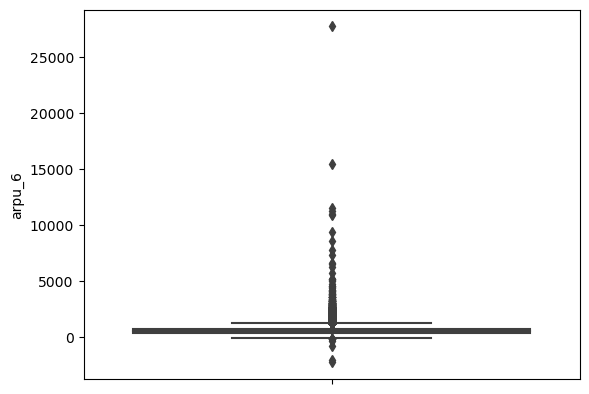

In [500]:
# ploting a boxplot for ARPU for June
sns.boxplot(data=churn,y=churn.arpu_6)

In [501]:
churn.arpu_6.describe()

count    30011.000000
mean       587.284404
std        442.722413
min      -2258.709000
25%        364.161000
50%        495.682000
75%        703.922000
max      27731.088000
Name: arpu_6, dtype: float64

**Everthing looks ok there are few high values but we can expect some high value cutomers**

<AxesSubplot:xlabel='arpu_7'>

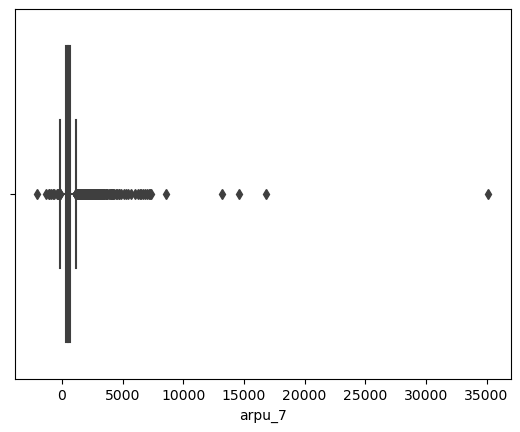

In [502]:
# ploting a boxplot for ARPU for July
sns.boxplot(data=churn,x=churn.arpu_7)

In [503]:
churn.arpu_7.describe()

count    30011.000000
mean       589.135427
std        462.897814
min      -2014.045000
25%        365.004500
50%        493.561000
75%        700.788000
max      35145.834000
Name: arpu_7, dtype: float64

<AxesSubplot:ylabel='arpu_8'>

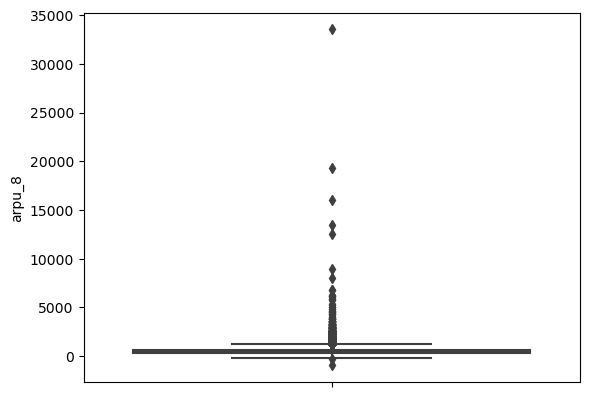

In [504]:
# ploting a boxplot for ARPU for AUG
sns.boxplot(data=churn,y=churn.arpu_8)

In [505]:
churn.arpu_8.describe()

count    30011.000000
mean       534.857433
std        492.259586
min       -945.808000
25%        289.609500
50%        452.091000
75%        671.150000
max      33543.624000
Name: arpu_8, dtype: float64

In [506]:
churn.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,297.385708,305.635027,270.922215,420.944380,426.806717,382.877999,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,95.031643,96.071691,88.103593,182.369489,182.343145,170.588886,6.983331,7.101811,6.504003,1.567160,1.862229,1.712739,284.733476,285.858795,266.151320,189.896647,200.021986,172.439886,203.512523,213.807890,180.420182,2.010766,2.034241,1.789728,396.245986,416.720722,356.207080,2.264425,2.207400,2.029314,5.919101,7.433867,6.906446,0.692507,0.047600,0.059131,686.69754

# Derive new features

In [507]:
# List the columns of total mou, rech_num and rech_amt
[total for total in churn.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

**Deriving new column decrease_mou_action**

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [508]:
# Total mou at good phase incoming and outgoing
churn['total_mou_good'] = (churn['total_og_mou_6'] + churn['total_ic_mou_6'])

In [509]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
churn['avg_mou_action'] = (churn['total_og_mou_7'] + churn['total_og_mou_8'] + churn['total_ic_mou_7'] + churn['total_ic_mou_8'])/2

In [510]:
# Difference avg_mou_good and avg_mou_action
churn['diff_mou'] = churn['avg_mou_action'] - churn['total_mou_good']

In [511]:
# Checking whether the mou has decreased in action phase
churn['decrease_mou_action'] = np.where((churn['diff_mou'] < 0), 1, 0)

In [512]:
churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.

**Deriving new column decrease_rech_num_action**

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [513]:
# Avg rech number at action phase
churn['avg_rech_num_action'] = (churn['total_rech_num_7'] + churn['total_rech_num_8'])/2
# Difference total_rech_num_6 and avg_rech_action
churn['diff_rech_num'] = churn['avg_rech_num_action'] - churn['total_rech_num_6']
# Checking if rech_num has decreased in action phase
churn['decrease_rech_num_action'] = np.where((churn['diff_rech_num'] < 0), 1, 0)


In [514]:
churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.

**Deriving new column decrease_rech_amt_action**

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [515]:
# Avg rech_amt in action phase
churn['avg_rech_amt_action'] = (churn['total_rech_amt_7'] + churn['total_rech_amt_8'])/2
# Difference of action phase rech amt and good phase rech amt
churn['diff_rech_amt'] = churn['avg_rech_amt_action'] - churn['total_rech_amt_6']
# Checking if rech_amt has decreased in action phase
churn['decrease_rech_amt_action'] = np.where((churn['diff_rech_amt'] < 0), 1, 0) 
churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0,2214.0,634.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,

**Deriving new column decrease_arpu_action**

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [516]:
# ARUP in action phase
churn['avg_arpu_action'] = (churn['arpu_7'] + churn['arpu_8'])/2
# Difference of good and action phase ARPU
churn['diff_arpu'] = churn['avg_arpu_action'] - churn['arpu_6']
# Checking whether the arpu has decreased on the action month
churn['decrease_arpu_action'] = np.where(churn['diff_arpu'] < 0, 1, 0)
churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0,2214.0,634.0,0,2260.6650,1191.4850,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1

**Deriving new column decrease_vbc_action**

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [517]:
# VBC in action phase
churn['avg_vbc_3g_action'] = (churn['jul_vbc_3g'] + churn['aug_vbc_3g'])/2
# Difference of good and action phase VBC
churn['diff_vbc'] = churn['avg_vbc_3g_action'] - churn['jun_vbc_3g']
# Checking whether the VBC has decreased on the action month
churn['decrease_vbc_action'] = np.where(churn['diff_vbc'] < 0 , 1, 0)
churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0,2214.0,634.0,0,2260.6650,1191.4850,0,38.560,19.820,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38

# EDA
# Univariate analysis
Churn rate on the basis whether the customer decreased her/his MOU in action month

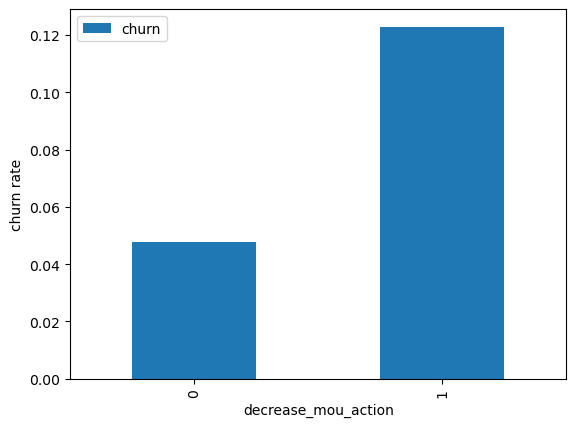

In [518]:
# Converting churn column to int in order to do aggfunc in the pivot table
churn['churn'] = churn['churn'].astype('int64')
churn.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

**Churn rate on the basis whether the customer decreased her/his number of recharge in action month**

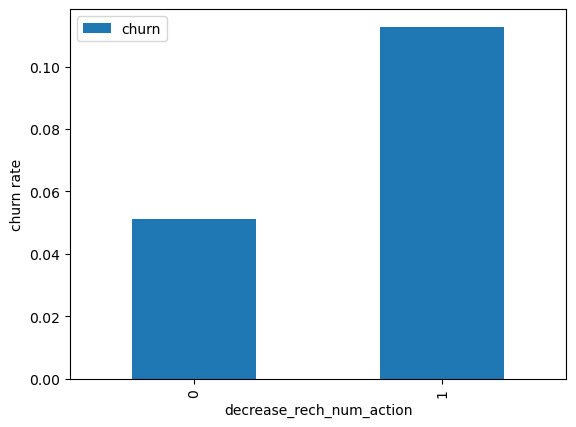

In [519]:
churn.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

**Churn rate on the basis whether the customer decreased her/his amount of recharge in action month**

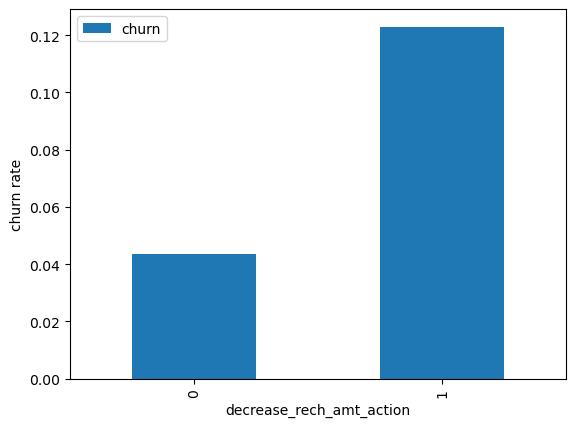

In [520]:
churn.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

**Churn rate on the basis whether the customer decreased her/his volume based cost in action month**

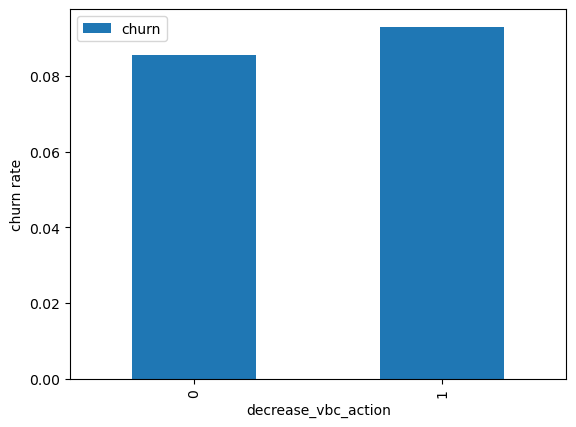

In [521]:
churn.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

**Analysis of the average revenue per customer (churn and not churn) in the action phase**

In [522]:
# Creating churn dataframe
data_churn = churn[churn['churn'] == 1]
# Creating not churn dataframe
data_non_churn = churn[churn['churn'] == 0]

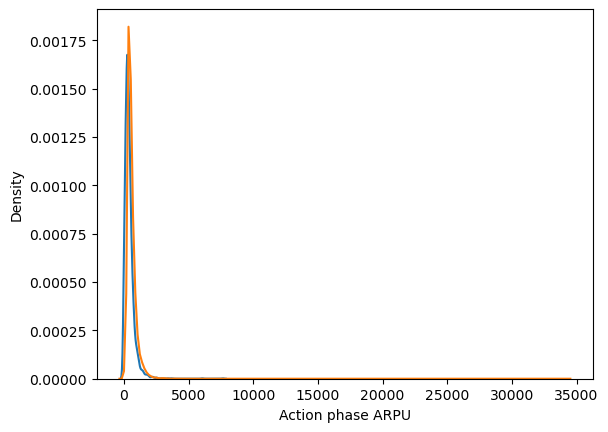

In [523]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
plt.show()

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

[Text(0.5, 0, 'Action phase MOU')]

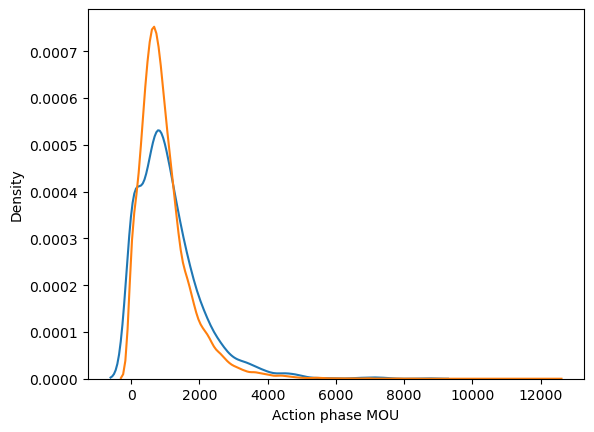

In [524]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

# Bivariate analysis

**Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase**

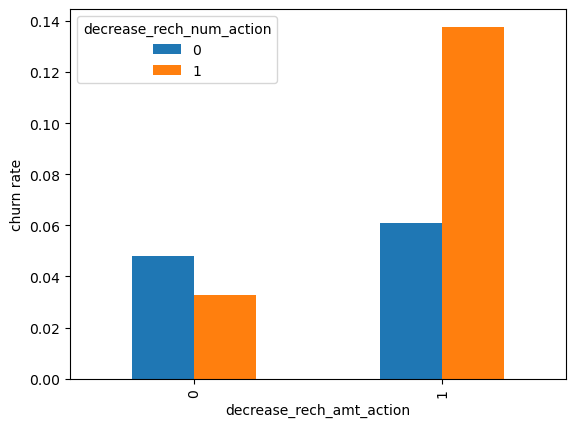

In [525]:
churn.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

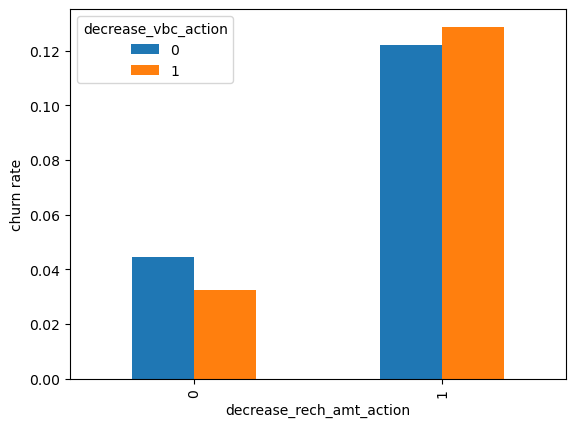

In [526]:
churn.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

**Analysis**

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [527]:
churn = churn.drop(['decrease_mou_action','decrease_rech_num_action','decrease_rech_amt_action','decrease_arpu_action','decrease_vbc_action'], axis=1)

In [528]:
churn.shape

(30011, 138)

**Every column looks fine we can proceed ahead**

In [529]:
churn.churn.value_counts(normalize=True)*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

<AxesSubplot:>

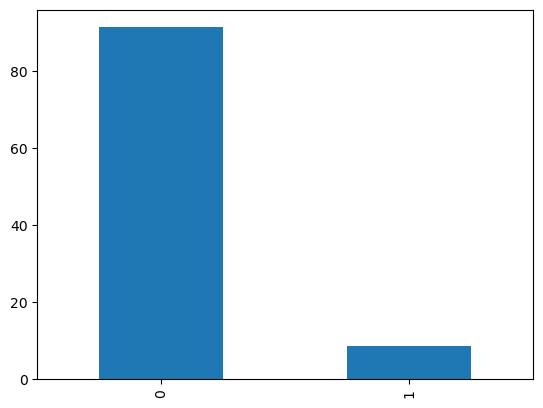

In [530]:
# checking for class imbalance
(churn.churn.value_counts(normalize=True)*100).plot.bar()

**As we can see people who will churn are very less than of those who will not churn, this is a classic case of class imbalace**

**First of all lets scale the date for better model perfomance**

# Data Splitting

In [531]:
# splitting the data into the test-Train
from sklearn.model_selection import train_test_split

In [532]:
# Spliting the data into X and y
y=churn.pop('churn')
X=churn

In [533]:
# data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3,stratify=y,random_state = 100)


In [534]:
col=X_train.columns

**For the data scaling we can also use the standard scalar but this data contain lot of outliers so that is the reason we are using the Min Max Scalar**

In [535]:
# We will be using MinMaxsSalar
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()


In [536]:
# Scaling the data
X_train[col]=scaler.fit_transform(X_train[col])

In [537]:
# lets see the effect of Scaling
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_mou_good,avg_mou_action,diff_mou,avg_rech_num_action,diff_rech_num,avg_rech_amt_action,diff_rech_amt,avg_arpu_action,diff_arpu,avg_vbc_3g_action,diff_vbc
count,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.00000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,0.160348,0.138128,0.073222,0.044815,0.037169,0.025149,0.050286,0.044127,0.027410,0.006777,0.003538,0.004570,0.007861,0.011662,0.005961,0.014726,0.014921,0.008112,0.038730,0.040192,0.034446,0.004746,0.006031,0.007067,0.004517,0.003203,0.0048

In [538]:
# Scaling the test data 
X_test[col]=scaler.transform(X_test[col])

In [539]:
# checking the shape of X_test
X_test.shape

(9004, 137)

**We are using all the major class imbalace techinques to see which one gives us the better Recall**

# Class Imbalance

**We will be using the Random Forest as our base model**

In [540]:
# Importing random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [541]:
# Checking all important metrics 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9380275433140827
F1 score:  0.5499999999999999
Recall:  0.4383033419023136
Precision:  0.7380952380952381

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8226
           1       0.74      0.44      0.55       778

    accuracy                           0.94      9004
   macro avg       0.84      0.71      0.76      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8105  121]
 [ 437  341]]


In [542]:
# Using Random Under sampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3630

In [543]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 1815), (1, 1815)]


In [544]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [545]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))


Accuracy:  0.8809418036428254
F1 score:  0.5395189003436427
Recall:  0.8071979434447301
Precision:  0.40516129032258064

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8226
           1       0.41      0.81      0.54       778

    accuracy                           0.88      9004
   macro avg       0.69      0.85      0.74      9004
weighted avg       0.93      0.88      0.90      9004


 confussion matrix:
 [[7304  922]
 [ 150  628]]


In [546]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

20714

In [547]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 18899), (1, 1815)]


In [548]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [549]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.9386939138160817
F1 score:  0.5605095541401274
Recall:  0.4524421593830334
Precision:  0.7364016736401674

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.74      0.45      0.56       778

    accuracy                           0.94      9004
   macro avg       0.84      0.72      0.76      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8100  126]
 [ 426  352]]


In [550]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

38384

In [551]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 19192), (1, 19192)]


In [552]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [553]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9393602843180808
F1 score:  0.5869894099848715
Recall:  0.4987146529562982
Precision:  0.7132352941176471

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.71      0.50      0.59       778

    accuracy                           0.94      9004
   macro avg       0.83      0.74      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8070  156]
 [ 390  388]]


In [554]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38384

In [555]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 19192), (1, 19192)]


In [556]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [557]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9288094180364282
F1 score:  0.6050523721503389
Recall:  0.6311053984575835
Precision:  0.5810650887573965

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8226
           1       0.58      0.63      0.61       778

    accuracy                           0.93      9004
   macro avg       0.77      0.79      0.78      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[7872  354]
 [ 287  491]]


In [558]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

38190

In [559]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 19192), (1, 18998)]


In [560]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [561]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9266992447800977
F1 score:  0.6009673518742443
Recall:  0.6388174807197944
Precision:  0.567351598173516

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.57      0.64      0.60       778

    accuracy                           0.93      9004
   macro avg       0.77      0.80      0.78      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[7847  379]
 [ 281  497]]


In [562]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

38374

In [563]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 19187), (1, 19187)]


In [564]:
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [565]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.9285872945357618
F1 score:  0.6086427267194158
Recall:  0.6426735218508998
Precision:  0.5780346820809249

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      8226
           1       0.58      0.64      0.61       778

    accuracy                           0.93      9004
   macro avg       0.77      0.80      0.78      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[7861  365]
 [ 278  500]]


**After appling all the techiques we are going ahead with Random undersampling because of its high recall value**

# Model Building

# Random Forest

**So we are starting with base model without hyperparameter tuning**

In [566]:
# importing random forest
rf_base=RandomForestClassifier(random_state=42, n_jobs=-1)
rf_base.fit(X_resampled_us, y_resampled_us)

y_pred = rf_base.predict(X_test)

In [567]:
# Printing all import matrix
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8858285206574855
F1 score:  0.5491228070175439
Recall:  0.8046272493573264
Precision:  0.4167776298268975

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8226
           1       0.42      0.80      0.55       778

    accuracy                           0.89      9004
   macro avg       0.70      0.85      0.74      9004
weighted avg       0.93      0.89      0.90      9004


 confussion matrix:
 [[7350  876]
 [ 152  626]]


**We got a recall score of 80% but we can futher improve this with hyperparameter tuning**

In [568]:
# importing random forst, gridsearch cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [569]:
# specifing the params for hyperparameters
params = {
    "max_depth": [11,12,13],
    "max_features": [9,10 ],
    "min_samples_leaf": [6,7,8],
    'n_estimators': [11,12,13]
}



In [570]:
# instigating the gridsearch cv
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [571]:
%%time
grid_search.fit(X_resampled_us, y_resampled_us)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
CPU times: user 1.45 s, sys: 178 ms, total: 1.63 s
Wall time: 19.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [11, 12, 13], 'max_features': [9, 10],
                         'min_samples_leaf': [6, 7, 8],
                         'n_estimators': [11, 12, 13]},
             scoring='recall', verbose=1)

In [572]:
grid_search.best_score_


0.809905330104735

In [573]:
# checking the best model
rf_best = grid_search.best_estimator_

In [574]:
# checking the best model params
rf_best

RandomForestClassifier(max_depth=13, max_features=10, min_samples_leaf=8,
                       n_estimators=12, n_jobs=-1, random_state=42)

In [575]:
# checking the model for train data
y_pred_train = rf_best.predict(X_train)

In [576]:
print ('Accuracy: ', accuracy_score(y_train, y_pred_train))
print ('F1 score: ', f1_score(y_train, y_pred_train))
print ('Recall: ', recall_score(y_train, y_pred_train))
print ('Precision: ', precision_score(y_train, y_pred_train))
print ('\n clasification report:\n', classification_report(y_train, y_pred_train))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_pred_train))

Accuracy:  0.8881801304327129
F1 score:  0.5766804829699045
Recall:  0.8815426997245179
Precision:  0.42849491162292447

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     19192
           1       0.43      0.88      0.58      1815

    accuracy                           0.89     21007
   macro avg       0.71      0.89      0.76     21007
weighted avg       0.94      0.89      0.90     21007


 confussion matrix:
 [[17058  2134]
 [  215  1600]]


In [577]:
# checking the model for test data
y_pred = rf_best.predict(X_test)

In [578]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8762772101288316
F1 score:  0.5259574468085106
Recall:  0.794344473007712
Precision:  0.3931297709923664

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      8226
           1       0.39      0.79      0.53       778

    accuracy                           0.88      9004
   macro avg       0.69      0.84      0.73      9004
weighted avg       0.93      0.88      0.89      9004


 confussion matrix:
 [[7272  954]
 [ 160  618]]


**Looking at the results after the hyperparameter tuning we can say our model is overfitting we can use a simpler model like logestic regression**

# logestic regression

In [579]:
# importing logestic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# fitting the data
logreg.fit(X_resampled_us, y_resampled_us)
# checking of test set
y_pred_logreg = logreg.predict(X_test)

In [580]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_logreg))
print ('F1 score: ', f1_score(y_test, y_pred_logreg))
print ('Recall: ', recall_score(y_test, y_pred_logreg))
print ('Precision: ', precision_score(y_test, y_pred_logreg))
print ('\n clasification report:\n', classification_report(y_test,y_pred_logreg))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_logreg))

Accuracy:  0.7968680586406042
F1 score:  0.407131280388979
Recall:  0.8071979434447301
Precision:  0.27221499783268316

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8226
           1       0.27      0.81      0.41       778

    accuracy                           0.80      9004
   macro avg       0.62      0.80      0.64      9004
weighted avg       0.92      0.80      0.84      9004


 confussion matrix:
 [[6547 1679]
 [ 150  628]]


**We got a better recall than random forest**

**we can build a logestic regression model and see the result**

In [581]:
# importing logestic regression
logreg = LogisticRegression()
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 20 columns
rfe = RFE(logreg, n_features_to_select=20)

# Fit the rfe model with train set
rfe = rfe.fit(X_resampled_us, y_resampled_us)

In [582]:
# Checking the column selection
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 22),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 21),
 ('onnet_mou_7', False, 28),
 ('onnet_mou_8', False, 46),
 ('offnet_mou_6', False, 89),
 ('offnet_mou_7', False, 15),
 ('offnet_mou_8', False, 45),
 ('roam_ic_mou_6', False, 6),
 ('roam_ic_mou_7', False, 59),
 ('roam_ic_mou_8', False, 16),
 ('roam_og_mou_6', False, 37),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 44),
 ('loc_og_t2t_mou_6', False, 109),
 ('loc_og_t2t_mou_7', False, 60),
 ('loc_og_t2t_mou_8', False, 36),
 ('loc_og_t2m_mou_6', False, 17),
 ('loc_og_t2m_mou_7', False, 61),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 117),
 ('loc_og_t2f_mou_7', False, 99),
 ('loc_og_t2f_mou_8', False, 24),
 ('loc_og_t2c_mou_6', False, 107),
 ('loc_og_t2c_mou_7', False, 78),
 ('loc_og_t2c_mou_8', False, 96),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 29),
 ('loc_og_mou_8', False, 5),
 ('std_og_t2t_mou_6', False, 82),
 ('std_og_t2t_mou_7', False, 14),
 ('std

In [583]:
# selected columns
col = X_resampled_us.columns[rfe.support_]
col

Index(['arpu_7', 'arpu_8', 'roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'avg_rech_amt_6_7', 'avg_mou_action', 'diff_mou', 'diff_rech_amt'],
      dtype='object')

In [584]:
# Implying it on X_train
X_train_new=X_resampled_us[col]

In [585]:
# checking the shape of X_train
X_train_new.shape

(3630, 20)

In [586]:
# importing the stasmodel
import statsmodels.api as sm

In [587]:
# adding a constant
X_train_lm = sm.add_constant(X_train_new)

In [588]:
# Running a linear regression model
logm1 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3609
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1564.1
Date:                Tue, 14 Mar 2023   Deviance:                       3128.1
Time:                        07:40:12   Pearson chi2:                 2.14e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.6283      1.536      3.012      0.003       1.617       7.640
arpu_7                 9.4643      7.014      1.349      0.177      -4.282      23.211
arpu_8                 3.3773      9.121      0.370      0.711     -14.500      21.255
roam_og_mou_7          4.5822      0.865      5.296      0.000       2.886       6.278
loc_og_t2m_mou_8      -7.0963      2.479     -2.863      0.004     -11.955      -2.238
std_og_mou_7           4.3230      1.947      2.220      0.026       0.506       8.140
total_og_mou_8       -26.3076      3.606     -7.296      0.000     -33.375     -19.240
loc_ic_mou_8          24.2836      4.619      5.258      0.000      15.231      33.336
total_ic_mou_8       -44.6771      4.851     -9.210      0.000     -54.185     -35.169
spl_ic_mou_8          -5.9320      1.060     -5.599      0.000      -8.009      -3.855
total_rech_num_8      -4.8586      1.579     -3.077      0.002      -7.953      -1.764
total_rech_amt_8      -7.7524      6.936     -1.118      0.264     -21.346       5.841
max_rech_amt_8         3.3093      2.015      1.642      0.101      -0.640       7.259
last_day_rch_amt_8   -18.8485      2.550     -7.393      0.000     -23.845     -13.851
monthly_2g_8          -6.8976      1.173     -5.882      0.000      -9.196      -4.599
sachet_2g_8           -7.9666      1.803     -4.418      0.000     -11.501      -4.432
monthly_3g_8         -13.8968      2.483     -5.597      0.000     -18.763      -9.031
avg_rech_amt_6_7       7.6715      7.715      0.994      0.320      -7.450      22.793
avg_mou_action        12.4458      3.903      3.189      0.001       4.797      20.095
diff_mou              -1.3464      1.392     -0.967      0.333      -4.075       1.382
diff_rech_amt         -7.9018      4.091     -1.931      0.053     -15.920       0.117
======================================================================================
"""

In [589]:
# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,diff_rech_amt,323.24
0,arpu_7,222.82
1,arpu_8,158.93
18,diff_mou,124.56
17,avg_mou_action,37.77
10,total_rech_amt_8,29.21
16,avg_rech_amt_6_7,15.17
5,total_og_mou_8,11.85
7,total_ic_mou_8,8.04
4,std_og_mou_7,7.35


**We have to remove  diff_rech_amt due to its high VIF value**

In [590]:
X_train2=X_train_new.drop('diff_rech_amt', axis = 1)

In [591]:
X_train2.shape

(3630, 19)

In [592]:
X_train_lm = sm.add_constant(X_train2)

In [593]:
# model 2
logm2 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3610
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1565.9
Date:                Tue, 14 Mar 2023   Deviance:                       3131.9
Time:                        07:40:12   Pearson chi2:                 2.25e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9259      0.660      2.920      0.004       0.633       3.219
arpu_7                 0.7629      5.241      0.146      0.884      -9.510      11.036
arpu_8                -2.7410      8.436     -0.325      0.745     -19.276      13.794
roam_og_mou_7          4.4698      0.867      5.155      0.000       2.770       6.169
loc_og_t2m_mou_8      -7.1643      2.477     -2.893      0.004     -12.018      -2.310
std_og_mou_7           4.2109      1.950      2.159      0.031       0.389       8.033
total_og_mou_8       -25.9733      3.622     -7.171      0.000     -33.072     -18.875
loc_ic_mou_8          24.7799      4.620      5.364      0.000      15.725      33.835
total_ic_mou_8       -45.1282      4.861     -9.283      0.000     -54.656     -35.600
spl_ic_mou_8          -5.8722      1.055     -5.565      0.000      -7.940      -3.804
total_rech_num_8      -4.7635      1.584     -3.007      0.003      -7.868      -1.658
total_rech_amt_8      -6.8324      6.858     -0.996      0.319     -20.275       6.610
max_rech_amt_8         3.5397      2.056      1.721      0.085      -0.491       7.570
last_day_rch_amt_8   -18.6263      2.565     -7.263      0.000     -23.653     -13.600
monthly_2g_8          -6.9196      1.173     -5.897      0.000      -9.219      -4.620
sachet_2g_8           -8.0270      1.807     -4.442      0.000     -11.569      -4.485
monthly_3g_8         -13.9408      2.495     -5.588      0.000     -18.830      -9.051
avg_rech_amt_6_7      18.3564      5.316      3.453      0.001       7.937      28.776
avg_mou_action        12.3839      3.916      3.162      0.002       4.708      20.059
diff_mou              -1.9719      1.351     -1.460      0.144      -4.619       0.675
======================================================================================
"""

In [594]:
# checking the vif
X_train_new=X_train2
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,121.52
1,arpu_8,112.50
18,diff_mou,101.07
17,avg_mou_action,37.43
10,total_rech_amt_8,22.23
5,total_og_mou_8,11.85
16,avg_rech_amt_6_7,8.84
7,total_ic_mou_8,8.04
4,std_og_mou_7,7.31
6,loc_ic_mou_8,5.42


**We have to remove arpu_7 due its high VIF value**

In [595]:
X_train3=X_train2.drop('arpu_7', axis = 1)

In [596]:
X_train_lm = sm.add_constant(X_train3)

In [597]:
# model 3
logm3 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3611
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1565.9
Date:                Tue, 14 Mar 2023   Deviance:                       3131.9
Time:                        07:40:13   Pearson chi2:                 2.24e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9723      0.578      3.413      0.001       0.840       3.105
arpu_8                -2.7138      8.432     -0.322      0.748     -19.241      13.813
roam_og_mou_7          4.4805      0.864      5.186      0.000       2.787       6.174
loc_og_t2m_mou_8      -7.1796      2.475     -2.901      0.004     -12.031      -2.328
std_og_mou_7           4.1982      1.948      2.155      0.031       0.379       8.017
total_og_mou_8       -26.1745      3.349     -7.816      0.000     -32.738     -19.611
loc_ic_mou_8          24.7530      4.615      5.363      0.000      15.707      33.799
total_ic_mou_8       -45.1783      4.848     -9.319      0.000     -54.680     -35.677
spl_ic_mou_8          -5.8749      1.055     -5.567      0.000      -7.943      -3.806
total_rech_num_8      -4.7396      1.576     -3.008      0.003      -7.828      -1.651
total_rech_amt_8      -6.7552      6.840     -0.988      0.323     -20.160       6.650
max_rech_amt_8         3.5666      2.049      1.740      0.082      -0.450       7.583
last_day_rch_amt_8   -18.6198      2.568     -7.251      0.000     -23.653     -13.587
monthly_2g_8          -6.9181      1.173     -5.896      0.000      -9.218      -4.618
sachet_2g_8           -8.0320      1.807     -4.446      0.000     -11.573      -4.491
monthly_3g_8         -13.9551      2.494     -5.596      0.000     -18.843      -9.067
avg_rech_amt_6_7      18.9104      3.721      5.082      0.000      11.617      26.204
avg_mou_action        12.5571      3.733      3.363      0.001       5.240      19.874
diff_mou              -1.8779      1.186     -1.583      0.113      -4.203       0.447
======================================================================================
"""

In [598]:
X_train_new=X_train3
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,100.95
17,diff_mou,53.00
16,avg_mou_action,34.48
9,total_rech_amt_8,21.18
4,total_og_mou_8,9.83
6,total_ic_mou_8,7.68
3,std_og_mou_7,7.30
5,loc_ic_mou_8,5.41
15,avg_rech_amt_6_7,4.52
10,max_rech_amt_8,3.93


**We have to remove arpu_8 due its high VIF value**

In [599]:
X_train4=X_train3.drop('arpu_8', axis = 1)

In [600]:
X_train_lm = sm.add_constant(X_train4)

In [601]:
# model 4
logm4 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3612
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.0
Date:                Tue, 14 Mar 2023   Deviance:                       3132.0
Time:                        07:40:13   Pearson chi2:                 2.28e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8782      0.499      3.766      0.000       0.901       2.856
roam_og_mou_7          4.4737      0.864      5.181      0.000       2.781       6.166
loc_og_t2m_mou_8      -7.2182      2.475     -2.916      0.004     -12.070      -2.367
std_og_mou_7           4.2275      1.947      2.172      0.030       0.412       8.043
total_og_mou_8       -26.4134      3.266     -8.086      0.000     -32.816     -20.011
loc_ic_mou_8          24.9755      4.565      5.471      0.000      16.028      33.923
total_ic_mou_8       -45.4642      4.769     -9.532      0.000     -54.812     -36.116
spl_ic_mou_8          -5.8680      1.055     -5.563      0.000      -7.935      -3.801
total_rech_num_8      -4.7257      1.573     -3.004      0.003      -7.809      -1.642
total_rech_amt_8      -8.4910      4.203     -2.020      0.043     -16.728      -0.254
max_rech_amt_8         3.6211      2.042      1.773      0.076      -0.381       7.623
last_day_rch_amt_8   -18.6126      2.562     -7.266      0.000     -23.634     -13.592
monthly_2g_8          -6.9277      1.173     -5.905      0.000      -9.227      -4.628
sachet_2g_8           -8.0319      1.806     -4.448      0.000     -11.571      -4.493
monthly_3g_8         -14.0113      2.485     -5.638      0.000     -18.882      -9.141
avg_rech_amt_6_7      18.3670      3.298      5.569      0.000      11.903      24.831
avg_mou_action        12.6998      3.707      3.426      0.001       5.433      19.966
diff_mou              -1.9697      1.152     -1.710      0.087      -4.227       0.288
======================================================================================
"""

In [602]:
X_train_new=X_train4
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,avg_mou_action,34.32
3,total_og_mou_8,9.81
8,total_rech_amt_8,8.54
5,total_ic_mou_8,7.68
2,std_og_mou_7,7.29
4,loc_ic_mou_8,5.41
16,diff_mou,4.01
9,max_rech_amt_8,3.91
7,total_rech_num_8,3.49
14,avg_rech_amt_6_7,3.47


**We have to remove avg_mou_action due its high VIF value**

In [603]:
X_train5=X_train4.drop('avg_mou_action', axis = 1)

In [604]:
X_train_lm = sm.add_constant(X_train5)

In [605]:
# model 5
logm5 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3613
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1572.1
Date:                Tue, 14 Mar 2023   Deviance:                       3144.2
Time:                        07:40:14   Pearson chi2:                 4.94e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8280      0.499      3.666      0.000       0.851       2.805
roam_og_mou_7          4.1410      0.857      4.835      0.000       2.462       5.820
loc_og_t2m_mou_8      -5.1493      2.400     -2.145      0.032      -9.854      -0.445
std_og_mou_7           9.0639      1.355      6.688      0.000       6.408      11.720
total_og_mou_8       -19.1990      2.478     -7.746      0.000     -24.057     -14.341
loc_ic_mou_8          23.5766      4.520      5.216      0.000      14.717      32.436
total_ic_mou_8       -37.5032      4.113     -9.118      0.000     -45.564     -29.442
spl_ic_mou_8          -5.9959      1.057     -5.675      0.000      -8.067      -3.925
total_rech_num_8      -5.1356      1.582     -3.247      0.001      -8.236      -2.035
total_rech_amt_8      -9.9094      4.326     -2.291      0.022     -18.388      -1.431
max_rech_amt_8         3.5124      2.082      1.687      0.092      -0.568       7.593
last_day_rch_amt_8   -19.2688      2.520     -7.646      0.000     -24.208     -14.329
monthly_2g_8          -6.9444      1.168     -5.945      0.000      -9.234      -4.655
sachet_2g_8           -8.0539      1.798     -4.479      0.000     -11.578      -4.529
monthly_3g_8         -14.5658      2.483     -5.866      0.000     -19.433      -9.699
avg_rech_amt_6_7      21.9586      3.085      7.119      0.000      15.913      28.004
diff_mou              -1.6080      1.149     -1.400      0.162      -3.860       0.644
======================================================================================
"""

In [606]:
X_train_new=X_train5
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_rech_amt_8,8.51
4,loc_ic_mou_8,5.30
3,total_og_mou_8,5.12
5,total_ic_mou_8,4.73
9,max_rech_amt_8,3.91
15,diff_mou,3.76
7,total_rech_num_8,3.48
14,avg_rech_amt_6_7,3.16
2,std_og_mou_7,2.95
10,last_day_rch_amt_8,2.69


**We have to remove total_rech_amt_8 due its high VIF value**

In [607]:
X_train6=X_train5.drop('total_rech_amt_8', axis = 1)

In [608]:
X_train_lm = sm.add_constant(X_train6)

In [609]:
# model 6
logm6 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3614
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1574.9
Date:                Tue, 14 Mar 2023   Deviance:                       3149.8
Time:                        07:40:14   Pearson chi2:                 5.54e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4046
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0933      0.488      4.287      0.000       1.136       3.050
roam_og_mou_7          3.8887      0.841      4.622      0.000       2.240       5.538
loc_og_t2m_mou_8      -4.4538      2.360     -1.887      0.059      -9.080       0.173
std_og_mou_7          10.1712      1.257      8.089      0.000       7.707      12.636
total_og_mou_8       -21.6558      2.274     -9.522      0.000     -26.114     -17.198
loc_ic_mou_8          23.6006      4.517      5.225      0.000      14.748      32.453
total_ic_mou_8       -37.4673      4.112     -9.112      0.000     -45.527     -29.408
spl_ic_mou_8          -6.0413      1.061     -5.691      0.000      -8.122      -3.961
total_rech_num_8      -6.6354      1.464     -4.534      0.000      -9.504      -3.767
max_rech_amt_8         1.8898      1.930      0.979      0.327      -1.893       5.673
last_day_rch_amt_8   -20.4583      2.556     -8.004      0.000     -25.468     -15.448
monthly_2g_8          -7.0894      1.163     -6.098      0.000      -9.368      -4.811
sachet_2g_8           -7.9061      1.798     -4.397      0.000     -11.431      -4.382
monthly_3g_8         -15.2291      2.481     -6.139      0.000     -20.091     -10.367
avg_rech_amt_6_7      16.1906      1.832      8.836      0.000      12.599      19.782
diff_mou              -2.1446      1.129     -1.899      0.058      -4.358       0.069
======================================================================================
"""

In [610]:
X_train_new=X_train6
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,5.30
5,total_ic_mou_8,4.73
3,total_og_mou_8,3.89
14,diff_mou,3.67
8,max_rech_amt_8,3.50
7,total_rech_num_8,2.99
2,std_og_mou_7,2.70
9,last_day_rch_amt_8,2.55
1,loc_og_t2m_mou_8,2.32
13,avg_rech_amt_6_7,1.78


**We have to remove loc_ic_mou_8 due its high VIF value**

In [611]:
X_train7=X_train6.drop('loc_ic_mou_8', axis = 1)

In [612]:
X_train_lm = sm.add_constant(X_train7)

In [613]:
# model 7
logm7 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3615
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.6
Date:                Tue, 14 Mar 2023   Deviance:                       3179.1
Time:                        07:40:14   Pearson chi2:                 5.99e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5201      0.475      5.303      0.000       1.589       3.451
roam_og_mou_7          3.3852      0.813      4.162      0.000       1.791       4.979
loc_og_t2m_mou_8      -0.6991      2.139     -0.327      0.744      -4.891       3.493
std_og_mou_7           9.8668      1.253      7.873      0.000       7.410      12.323
total_og_mou_8       -22.6306      2.291     -9.877      0.000     -27.121     -18.140
total_ic_mou_8       -20.1101      2.045     -9.836      0.000     -24.117     -16.103
spl_ic_mou_8          -6.2350      1.060     -5.882      0.000      -8.313      -4.157
total_rech_num_8      -7.6843      1.475     -5.210      0.000     -10.575      -4.794
max_rech_amt_8         0.7105      1.895      0.375      0.708      -3.003       4.424
last_day_rch_amt_8   -20.5708      2.592     -7.935      0.000     -25.652     -15.490
monthly_2g_8          -7.1735      1.167     -6.146      0.000      -9.461      -4.886
sachet_2g_8           -8.2128      1.820     -4.511      0.000     -11.781      -4.645
monthly_3g_8         -14.6711      2.439     -6.016      0.000     -19.451      -9.891
avg_rech_amt_6_7      16.6815      1.856      8.986      0.000      13.043      20.320
diff_mou              -2.7282      1.108     -2.463      0.014      -4.899      -0.557
======================================================================================
"""

In [614]:
X_train_new=X_train7
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,3.86
7,max_rech_amt_8,3.49
13,diff_mou,3.45
6,total_rech_num_8,2.99
2,std_og_mou_7,2.69
8,last_day_rch_amt_8,2.55
1,loc_og_t2m_mou_8,2.13
4,total_ic_mou_8,1.89
12,avg_rech_amt_6_7,1.78
10,sachet_2g_8,1.20


**We have to remove loc_og_t2m_mou_8 due its high P value**

In [615]:
X_train8=X_train7.drop('loc_og_t2m_mou_8', axis = 1)

In [616]:
X_train_lm = sm.add_constant(X_train8)

In [617]:
# model 8
logm8 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3616
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.6
Date:                Tue, 14 Mar 2023   Deviance:                       3179.2
Time:                        07:40:14   Pearson chi2:                 5.64e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5056      0.473      5.296      0.000       1.578       3.433
roam_og_mou_7          3.3960      0.812      4.183      0.000       1.805       4.987
std_og_mou_7          10.0082      1.181      8.474      0.000       7.693      12.323
total_og_mou_8       -22.8797      2.168    -10.553      0.000     -27.129     -18.630
total_ic_mou_8       -20.3441      1.920    -10.594      0.000     -24.108     -16.580
spl_ic_mou_8          -6.2182      1.058     -5.876      0.000      -8.292      -4.144
total_rech_num_8      -7.6458      1.470     -5.202      0.000     -10.527      -4.765
max_rech_amt_8         0.6945      1.891      0.367      0.713      -3.011       4.400
last_day_rch_amt_8   -20.5558      2.591     -7.933      0.000     -25.635     -15.477
monthly_2g_8          -7.1702      1.167     -6.146      0.000      -9.457      -4.884
sachet_2g_8           -8.2143      1.820     -4.513      0.000     -11.781      -4.647
monthly_3g_8         -14.6488      2.436     -6.013      0.000     -19.424      -9.874
avg_rech_amt_6_7      16.6894      1.864      8.953      0.000      13.036      20.343
diff_mou              -2.7142      1.107     -2.452      0.014      -4.884      -0.545
======================================================================================
"""

In [618]:
X_train_new=X_train8
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,max_rech_amt_8,3.48
2,total_og_mou_8,3.39
12,diff_mou,3.18
5,total_rech_num_8,2.97
7,last_day_rch_amt_8,2.55
1,std_og_mou_7,2.39
11,avg_rech_amt_6_7,1.77
3,total_ic_mou_8,1.75
9,sachet_2g_8,1.20
10,monthly_3g_8,1.19


**We have to remove max_rech_amt_8 due its high P value**

In [619]:
X_train9=X_train8.drop('max_rech_amt_8', axis = 1)

In [620]:
X_train_lm = sm.add_constant(X_train9)

In [621]:
# model 9
logm9 = sm.GLM(y_resampled_us, X_train_lm, family = sm.families.Binomial()).fit()
logm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3630
Model:                            GLM   Df Residuals:                     3617
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.7
Date:                Tue, 14 Mar 2023   Deviance:                       3179.4
Time:                        07:40:15   Pearson chi2:                 5.65e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4901      0.471      5.285      0.000       1.567       3.414
roam_og_mou_7          3.4106      0.811      4.207      0.000       1.822       5.000
std_og_mou_7           9.9921      1.179      8.473      0.000       7.681      12.304
total_og_mou_8       -22.8302      2.164    -10.551      0.000     -27.071     -18.589
total_ic_mou_8       -20.2362      1.895    -10.681      0.000     -23.950     -16.523
spl_ic_mou_8          -6.2230      1.059     -5.877      0.000      -8.298      -4.148
total_rech_num_8      -7.6939      1.464     -5.256      0.000     -10.563      -4.825
last_day_rch_amt_8   -20.1518      2.357     -8.548      0.000     -24.772     -15.531
monthly_2g_8          -7.1285      1.160     -6.144      0.000      -9.403      -4.854
sachet_2g_8           -8.1820      1.817     -4.504      0.000     -11.742      -4.622
monthly_3g_8         -14.4100      2.339     -6.160      0.000     -18.995      -9.825
avg_rech_amt_6_7      16.8208      1.825      9.217      0.000      13.244      20.398
diff_mou              -2.6609      1.097     -2.425      0.015      -4.811      -0.510
======================================================================================
"""

In [622]:
X_train_new=X_train9
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,3.35
5,total_rech_num_8,2.95
11,diff_mou,2.95
1,std_og_mou_7,2.37
3,total_ic_mou_8,1.73
10,avg_rech_amt_6_7,1.71
6,last_day_rch_amt_8,1.64
8,sachet_2g_8,1.20
9,monthly_3g_8,1.15
0,roam_og_mou_7,1.14


**Logm5 is our final model**

In [623]:
# Getting the predicted value on the train set
y_train_pred = logm9.predict(X_train_lm)
y_train_pred[:20]

0     0.097499
1     0.010853
2     0.220919
3     0.183547
4     0.323400
5     0.020551
6     0.642557
7     0.115339
8     0.196191
9     0.000002
10    0.149224
11    0.341113
12    0.298490
13    0.033272
14    0.694831
15    0.511192
16    0.130054
17    0.103448
18    0.387480
19    0.663251
dtype: float64

In [624]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([9.74988205e-02, 1.08525801e-02, 2.20918977e-01, 1.83546831e-01,
       3.23400079e-01, 2.05514757e-02, 6.42557171e-01, 1.15338855e-01,
       1.96190899e-01, 1.51216426e-06, 1.49223882e-01, 3.41113021e-01,
       2.98490243e-01, 3.32717005e-02, 6.94830793e-01, 5.11191950e-01,
       1.30053862e-01, 1.03448443e-01, 3.87479670e-01, 6.63250664e-01])

In [625]:
y_train_pred_final = pd.DataFrame({'Churn':y_resampled_us.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.097499
1,0,0.010853
2,0,0.220919
3,0,0.183547
4,0,0.323400


In [626]:
# Creating a dataframe with the actual churn and the predicted probabilities
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted
0,0,0.097499,0
1,0,0.010853,0
2,0,0.220919,0
3,0,0.183547,0
4,0,0.323400,0


In [627]:
from sklearn import metrics

In [628]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
confusion

array([[1471,  344],
       [ 302, 1513]])

In [629]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.822038567493113

In [630]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [631]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8147549811523963

In [632]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8336088154269973

In [633]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [634]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

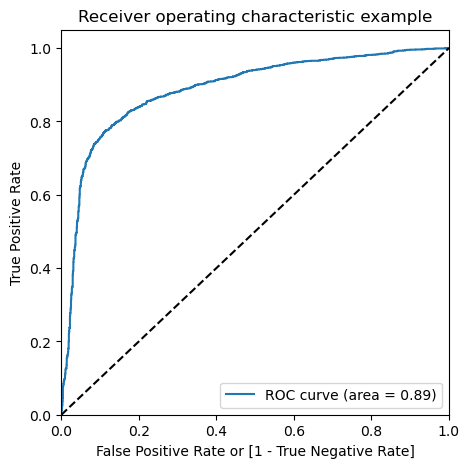

In [635]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [636]:
# Creating columns for different probablity cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.097499,0,1,0,0,0,0,0,0,0,0,0
1,0,0.010853,0,1,0,0,0,0,0,0,0,0,0
2,0,0.220919,0,1,1,1,0,0,0,0,0,0,0
3,0,0.183547,0,1,1,0,0,0,0,0,0,0,0
4,0,0.323400,0,1,1,1,1,0,0,0,0,0,0


In [637]:
# Creating a dataframe
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.642149,0.968595,0.315702
0.2,0.2,0.714325,0.942149,0.486501
0.3,0.3,0.763636,0.908540,0.618733
0.4,0.4,0.799449,0.872727,0.726171
0.5,0.5,0.822039,0.833609,0.810468
0.6,0.6,0.827824,0.782369,0.873278
0.7,0.7,0.819284,0.713499,0.925069
0.8,0.8,0.759504,0.563636,0.955372
0.9,0.9,0.577686,0.173003,0.982369


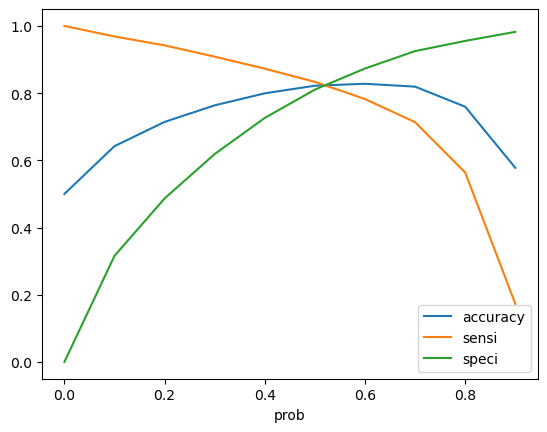

In [638]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.53 as the optimum probability cutoff, we are taking *0.40* for acheiving higher sensitivity, which is our main goal.**

In [639]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.097499,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.010853,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.220919,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.183547,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.323400,0,1,1,1,1,0,0,0,0,0,0,0


In [640]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7994490358126721

In [641]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[1318,  497],
       [ 231, 1584]])

In [642]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [643]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7611725132148006

In [644]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8727272727272727

In [645]:
from sklearn.metrics import precision_recall_curve

In [646]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

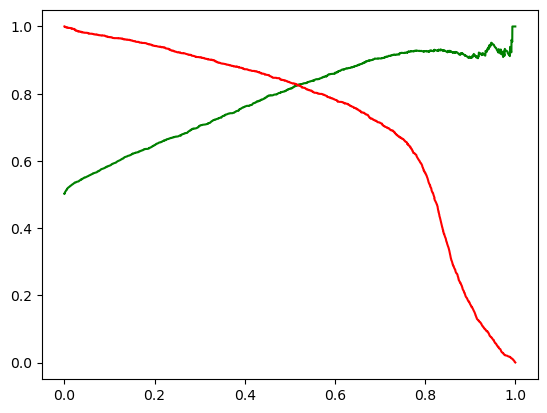

In [647]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [648]:
col = X_train9.columns

In [649]:
# Select the columns in X_train for X_test as well
X_test_log = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_log)

In [650]:
X_test_log.shape

(9004, 12)

In [651]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = logm9.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Churn_Prob'})
y_pred_final.head()

,churn,Churn_Prob
0,0,0.806712
1,0,0.126270
2,0,0.000079
3,0,0.230274
4,0,0.360879


In [652]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [653]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.7534429142603287

In [654]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6122, 2104],
       [ 116,  662]])

In [655]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [656]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.2393347794649313

In [657]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8508997429305912

**We got a pretty good result with logestic Regression**

**I wanted to check whether Xgboost works better than logestic regression**

# XGboost

In [658]:
# importing Xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [659]:
# training the base model
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')


In [660]:
%%time
xgb_cfl.fit(X_resampled_us, y_resampled_us)

CPU times: user 12.2 s, sys: 27.7 ms, total: 12.3 s
Wall time: 3.12 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [661]:
# Predicting the test set
y_pred=xgb_cfl.predict(X_test)

In [662]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8741670368725011
F1 score:  0.5347022587268994
Recall:  0.8367609254498715
Precision:  0.3928786964393482

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      8226
           1       0.39      0.84      0.53       778

    accuracy                           0.87      9004
   macro avg       0.69      0.86      0.73      9004
weighted avg       0.93      0.87      0.89      9004


 confussion matrix:
 [[7220 1006]
 [ 127  651]]


**Model worked quite well lets check the results with hyperparameter tuning**

In [663]:
# instigate the params for xg boost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 4

param_comb = 200

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=4, verbose=3, random_state=42)


In [664]:
%%time
random_search.fit(X_resampled_us, y_resampled_us)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
[CV 2/4] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=500, subsample=0.6;, score=0.852 total time=  25.3s
[CV 4/4] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.02, max_depth=4, min_child_weight=1, n_estimators=500, subsample=1.0;, score=0.863 total time=  24.3s
[CV 3/4] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=10, n_estimators=500, subsample=0.6;, score=0.834 total time=  17.1s
[CV 3/4] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=500, subsample=1.0;, score=0.839 total time=  31.5s
[CV 1/4] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.881 total time=   5.7s
[CV 1/4] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=3, min_child_weight=1, n_estimators=750, subsamp

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_l

In [665]:
# checking the result params
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=750,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best accuracy for 4-fold search with 200 parameter combinations:
0.8666629834522486

 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [666]:
xgb_best=random_search.best_estimator_

In [667]:
# checking the best model params
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=750,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [668]:
# checking the model on test data
y_pred=xgb_best.predict(X_test)

In [669]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8858285206574855
F1 score:  0.5606837606837607
Recall:  0.8431876606683805
Precision:  0.4199743918053777

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8226
           1       0.42      0.84      0.56       778

    accuracy                           0.89      9004
   macro avg       0.70      0.87      0.75      9004
weighted avg       0.93      0.89      0.90      9004


 confussion matrix:
 [[7320  906]
 [ 122  656]]


**Looking at the test results we can say that the Xgboost worked better than logestic regression. Its has little better recall and far better Precision than the logestic regression , we are not moving ahead with Xgboost as it took a lot of time in training the model also our focus is only on Recall as per problem statement**

**We are going ahead with logestic regression due to following reasons:**
* Logestic regression is a simple model than Xgboost
* It's comes with better explainability
* Xgboost is talking soo much time in training
* Recall is almost similar in both the models

# Model with PCA

In [670]:
#Import PCA
from sklearn.decomposition import PCA

In [671]:
# Instantiate PCA
pca = PCA(random_state=42)

In [672]:
# Fit train set on PCA
pca.fit(X_resampled_us)

PCA(random_state=42)

In [673]:
# Principal components
pca.components_

array([[ 1.59426563e-02,  8.20830337e-03, -8.70591747e-03, ...,
        -1.53709757e-02, -1.71560919e-02, -5.98746060e-04],
       [ 6.58655546e-02,  6.92596243e-02,  5.30557528e-02, ...,
         1.06322332e-03, -1.26168593e-02,  4.90011491e-03],
       [-2.97077943e-03,  7.06633690e-02,  7.57204568e-02, ...,
         7.76833541e-02,  5.33099439e-02,  1.07669530e-02],
       ...,
       [-0.00000000e+00, -1.13601223e-01, -1.22090901e-01, ...,
        -1.28369537e-15, -2.21838653e-01, -1.89853095e-02],
       [-0.00000000e+00, -3.61545977e-01, -3.88565133e-01, ...,
        -1.17961196e-15, -2.90598926e-01,  6.49564367e-02],
       [-0.00000000e+00,  2.90876373e-02,  3.12614228e-02, ...,
         3.23525928e-16,  1.64117166e-02,  6.66197301e-03]])

In [674]:
pca.explained_variance_ratio_

array([2.09257771e-01, 1.37234810e-01, 8.37358838e-02, 7.08955631e-02,
       5.44302262e-02, 4.07757521e-02, 3.52887706e-02, 3.04009440e-02,
       2.54640920e-02, 2.36539527e-02, 1.70856618e-02, 1.68284193e-02,
       1.53998816e-02, 1.39330112e-02, 1.28250851e-02, 1.26119974e-02,
       1.18174250e-02, 1.09608775e-02, 9.60925005e-03, 8.61744956e-03,
       8.46804522e-03, 7.40733832e-03, 7.36312080e-03, 6.49231670e-03,
       6.43355668e-03, 6.12109643e-03, 5.94089654e-03, 5.61176908e-03,
       5.25842872e-03, 5.09764555e-03, 4.84679672e-03, 4.47403018e-03,
       4.29745328e-03, 4.07523937e-03, 3.91078684e-03, 3.43565778e-03,
       3.34334672e-03, 3.05099615e-03, 2.94288939e-03, 2.89573531e-03,
       2.83202154e-03, 2.59668503e-03, 2.57150422e-03, 2.48239892e-03,
       2.45237131e-03, 2.30379411e-03, 2.16387308e-03, 2.13941194e-03,
       2.06961923e-03, 1.95921369e-03, 1.91364862e-03, 1.76356279e-03,
       1.72668261e-03, 1.71714647e-03, 1.52260749e-03, 1.40930155e-03,
      

In [675]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.20925777 0.34649258 0.43022846 0.50112403 0.55555425 0.59633001
 0.63161878 0.66201972 0.68748381 0.71113776 0.72822343 0.74505185
 0.76045173 0.77438474 0.78720982 0.79982182 0.81163925 0.82260012
 0.83220937 0.84082682 0.84929487 0.85670221 0.86406533 0.87055764
 0.8769912  0.8831123  0.88905319 0.89466496 0.89992339 0.90502104
 0.90986783 0.91434186 0.91863932 0.92271456 0.92662534 0.930061
 0.93340435 0.93645534 0.93939823 0.94229397 0.94512599 0.94772268
 0.95029418 0.95277658 0.95522895 0.95753274 0.95969662 0.96183603
 0.96390565 0.96586486 0.96777851 0.96954207 0.97126876 0.9729859
 0.97450851 0.97591781 0.97729523 0.97862133 0.97986803 0.98100017
 0.98210823 0.98316849 0.98419677 0.98517888 0.98608465 0.986988
 0.987858   0.98870455 0.9894916  0.99023454 0.99095439 0.99164154
 0.99229908 0.99287345 0.99342566 0.99395693 0.99444929 0.99491026
 0.99534481 0.99575375 0.99614955 0.99653729 0.99688573 0.99721296
 0.99752544 0.99780333 0.99804445 0.99826618 0.99845651 0.99863653


Text(0, 0.5, 'Cumulative Variance')

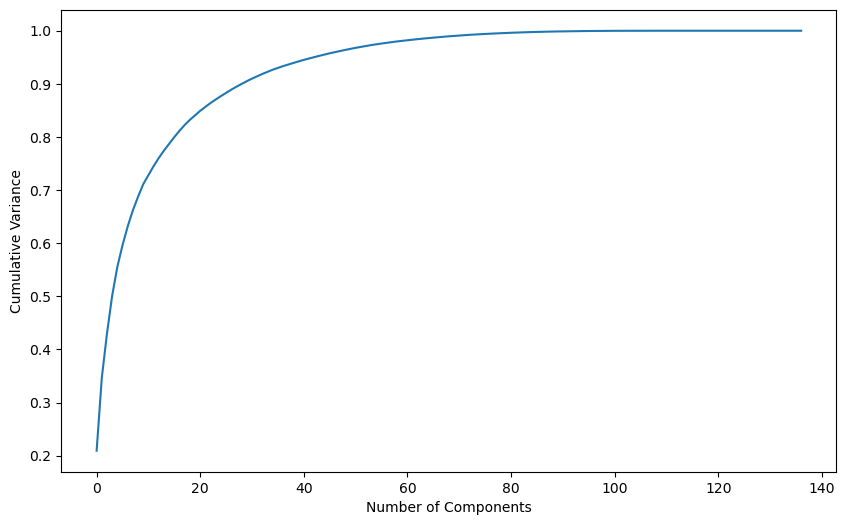

In [676]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [677]:
pca_final=PCA(0.96)

In [678]:
X_train_pca=pca_final.fit_transform(X_resampled_us)

In [679]:
X_train_pca.shape

(3630, 48)

In [680]:
X_test_pca=pca_final.transform(X_test)

In [681]:
X_test_pca.shape

(9004, 48)

# Random forest with PCA

In [682]:
rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)

In [683]:
params = {
    "max_depth": [11,12,13],
    "max_features": [9,10,11 ],
    "min_samples_leaf": [5,6,7,],
    'n_estimators': [12,13,14]
}


In [684]:
grid_search = GridSearchCV(estimator=rf_pca,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [685]:
%%time
grid_search.fit(X_train_pca, y_resampled_us)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
CPU times: user 1.98 s, sys: 149 ms, total: 2.13 s
Wall time: 32.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [11, 12, 13], 'max_features': [9, 10, 11],
                         'min_samples_leaf': [5, 6, 7],
                         'n_estimators': [12, 13, 14]},
             scoring='recall', verbose=1)

In [686]:
grid_search.best_score_

0.8088356137740564

In [687]:
rf_best_pca=grid_search.best_estimator_

In [688]:
rf_best_pca

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=6,
                       n_estimators=13, n_jobs=-1, random_state=42)

In [689]:
y_pred=rf_best_pca.predict(X_test_pca)

In [690]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8195246557085739
F1 score:  0.42396313364055305
Recall:  0.7686375321336761
Precision:  0.29270680372001956

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      8226
           1       0.29      0.77      0.42       778

    accuracy                           0.82      9004
   macro avg       0.63      0.80      0.66      9004
weighted avg       0.92      0.82      0.85      9004


 confussion matrix:
 [[6781 1445]
 [ 180  598]]


# Logestic regression with PCA

In [691]:
logreg_pca = LogisticRegression()
logreg.fit(X_train_pca, y_resampled_us)

y_pred_logreg = logreg.predict(X_test_pca)

In [692]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_logreg))
print ('F1 score: ', f1_score(y_test, y_pred_logreg))
print ('Recall: ', recall_score(y_test, y_pred_logreg))
print ('Precision: ', precision_score(y_test, y_pred_logreg))
print ('\n clasification report:\n', classification_report(y_test,y_pred_logreg))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_logreg))

Accuracy:  0.7935362061306086
F1 score:  0.4039756332157743
Recall:  0.8097686375321337
Precision:  0.2691157624946604

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      8226
           1       0.27      0.81      0.40       778

    accuracy                           0.79      9004
   macro avg       0.62      0.80      0.64      9004
weighted avg       0.92      0.79      0.83      9004


 confussion matrix:
 [[6515 1711]
 [ 148  630]]


# Final conclusion

**We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression without PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.**

# Important features

In [695]:
coefficients = logm9.params

In [696]:
sorted_coefficients = coefficients.sort_values()
sorted_coefficients

total_og_mou_8       -22.830230
total_ic_mou_8       -20.236170
last_day_rch_amt_8   -20.151778
monthly_3g_8         -14.409955
sachet_2g_8           -8.182029
total_rech_num_8      -7.693902
monthly_2g_8          -7.128496
spl_ic_mou_8          -6.222967
diff_mou              -2.660920
const                  2.490090
roam_og_mou_7          3.410555
std_og_mou_7           9.992116
avg_rech_amt_6_7      16.820792
dtype: float64

# Recomendations

* Identify the customers who have lower usage of incoming local calls and outgoing ISD calls during the action phase, primarily in August.

* Look for customers with lower recharges in august, there are likely to churn

* Customers who recharge their 3G monthly plan less in August are more likely to churn.

* Customers who use less 2G data in August are most likely to churn.

* Customers who have decreasing special incoming calls in August are more likely to churn.

* Customers with using only incoming calls in the month of August are the one most linkely to churn.
* customers with roaming increases in The month of july are likely to churn